In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn imbalanced-learn xgboost catboost lightgbm
!pip install catboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
import seaborn as sns
# Data Loading and Numerical Operations
import pandas as pd
import numpy as np
# Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Data Resampling
from sklearn.utils import resample
# Data Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
# Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# Ensembling
from mlxtend.classifier import StackingCVClassifier
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.metrics import specificity_score, sensitivity_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

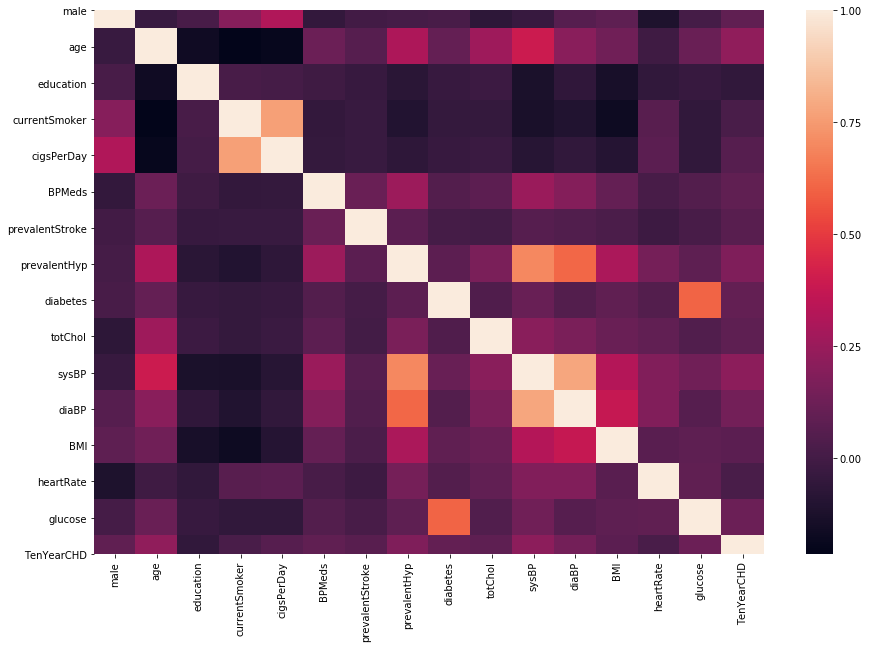

TypeError: cpu_count() got an unexpected keyword argument 'only_physical_cores'

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
df_fhs=pd.read_csv('framingham.csv')
df_fhs['glucose'] = df_fhs['glucose'].fillna(df_fhs['glucose'].mean())
df_fhs['education'] = df_fhs['education'].fillna(df_fhs['education'].mean())
df_fhs['cigsPerDay'] = df_fhs['cigsPerDay'].fillna(df_fhs['cigsPerDay'].mean())
df_fhs['BPMeds'] = df_fhs['BPMeds'].fillna(df_fhs['BPMeds'].mean())
df_fhs['totChol'] = df_fhs['totChol'].fillna(df_fhs['totChol'].mean())
df_fhs['BMI'] = df_fhs['BMI'].fillna(df_fhs['BMI'].mean())
df_fhs['heartRate'] = df_fhs['heartRate'].fillna(df_fhs['heartRate'].mean())
corr_fhs=df_fhs.corr(method='pearson')
corr_fhs
plt.figure(figsize=(15,10))
sns.heatmap(corr_fhs)
plt.show()
df_fhs['TenYearCHD'].value_counts(normalize=True)
target1=df_fhs[df_fhs['TenYearCHD']==1]
target0=df_fhs[df_fhs['TenYearCHD']==0]
target1=resample(target1,replace=True,n_samples=len(target0),random_state=40)
target=pd.concat([target0,target1])
target['TenYearCHD'].value_counts()
df_fhs=target
np.shape(df_fhs)
y = df_fhs['TenYearCHD']
X = df_fhs.drop(['TenYearCHD'], axis=1)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.4, random_state=1)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []
spec = []
sens = []

#function to call for storing the results
def storeResults(model, a,b,c,d,e,f):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))
    spec.append(round(e,3))
    sens.append(round(f,3))
# # # Stacking Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define your estimators
estimators = [('rf', RandomForestClassifier()), ('mlp', MLPClassifier(random_state=1, max_iter=30))]

# Initialize stacking classifier
clf = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier(num_threads=-1))

# Train the stacking classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
stac_acc = accuracy_score(y_pred, y_test)
stac_prec = precision_score(y_pred, y_test, average='weighted')
stac_rec = recall_score(y_pred, y_test, average='weighted')
stac_f1 = f1_score(y_pred, y_test, average='weighted')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives

# Calculate specificity and sensitivity
specificity = TN / (TN + FP)
sensitivity = TP / (TP + FN)

# Print the values
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

# Store the results (replace storeResults with the appropriate function)
storeResults('Stacking Classifier', stac_acc, stac_prec, stac_rec, stac_f1, specificity, sensitivity)
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                       'Precision': precision,
                       'Recall'   : recall,
                       'F1_score' : f1score,
                       'Specificity' : spec,
                       'Sensitivity' : sens
                      })
result

In [ ]:
# from joblib import dump

# model =clf
# dump(model, 'clf.joblib')

import joblib
filename = 'model.sav'
joblib.dump(clf, filename)

In [6]:
from joblib import dump

model =clf
dump(model, 'clf.joblib')

['clf.joblib']

In [ ]:
from joblib import load

model = load('clf.joblib')
def input_features():
    print("Please enter the patient's details for CHD risk prediction:")

    # Initialize an empty dictionary for the features
    features_input = {}

    # List of features for which the model expects input
    feature_names = [
        "age", "sex", "education", "currentSmoker", "cigsPerDay", "BPMeds",
        "prevalentStroke", "prevalentHyp", "diabetes", "totChol", "sysBP",
        "diaBP", "BMI", "heartRate", "glucose"
    ]

    # Loop through each feature, prompt the user, and store the input
    for feature in feature_names:
        # For binary features or features requiring specific instructions, include conditional handling
        if feature in ["sex", "currentSmoker", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes"]:
            print(f"{feature} (Enter 1 for Yes, 0 for No): ", end="")
        elif feature == "education":
            print(f"{feature} (1: Some High School, 2: High School or GED, 3: Some College, 4: College): ", end="")
        else:
            print(f"{feature}: ", end="")

        # Convert input to float for numerical features and int for categorical/binary features
        if feature in ["sex", "currentSmoker", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes", "education"]:
            value = int(input())
        else:
            value = float(input())

        features_input[feature] = value

    # Convert the dictionary to a list in the order expected by the model
    input_data = [features_input[feature] for feature in feature_names]

    return input_data
user_input = input_features()
user_input_reshaped = np.array(user_input).reshape(1, -1)
user_input_scaled = scaler.transform(user_input_reshaped)
prediction = model.predict(user_input_scaled)
print("The predicted risk of 10-year CHD is:", prediction[0])

Please enter the patient's details for CHD risk prediction:
age: 38
sex (Enter 1 for Yes, 0 for No): 0
education (1: Some High School, 2: High School or GED, 3: Some College, 4: College): 2
currentSmoker (Enter 1 for Yes, 0 for No): 1
cigsPerDay: 20
BPMeds (Enter 1 for Yes, 0 for No): 0
prevalentStroke (Enter 1 for Yes, 0 for No): 0
prevalentHyp (Enter 1 for Yes, 0 for No): 1
diabetes (Enter 1 for Yes, 0 for No): 0
totChol: 221
sysBP: 140
diaBP: 90
BMI: 21.35
heartRate: 95
glucose: 70
The predicted risk of 10-year CHD is: 1


In [ ]:
from joblib import load
import numpy as np

def input_features():
    print("Please enter the patient's details for CHD risk prediction:")

    # Initialize an empty dictionary for the features
    features_input = {}

    # List of features for which the model expects input
    feature_names = [
        "age", "sex", "education", "currentSmoker", "cigsPerDay", "BPMeds",
        "prevalentStroke", "prevalentHyp", "diabetes", "totChol", "sysBP",
        "diaBP", "BMI", "heartRate", "glucose"
    ]

    # Loop through each feature, prompt the user, and store the input
    for feature in feature_names:
        # For binary features or features requiring specific instructions, include conditional handling
        if feature in ["sex", "currentSmoker", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes"]:
            print(f"{feature} (Enter 1 for Yes, 0 for No): ", end="")
        elif feature == "education":
            print(f"{feature} (1: Some High School, 2: High School or GED, 3: Some College, 4: College): ", end="")
        else:
            print(f"{feature}: ", end="")

        # Convert input to float for numerical features and int for categorical/binary features
        if feature in ["sex", "currentSmoker", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes", "education"]:
            value = int(input())
        else:
            value = float(input())

        features_input[feature] = value

    # Convert the dictionary to a list in the order expected by the model
    input_data = [features_input[feature] for feature in feature_names]

    return input_data

# Load the scaler and the model
model = load('clf.joblib')

# Get user input
user_input = input_features()

# Preprocess the user input
user_input_reshaped = np.array(user_input).reshape(1, -1)
user_input_scaled = scaler.transform(user_input_reshaped)

# Make a prediction
prediction = model.predict(user_input_scaled)
print("The predicted risk of 10-year CHD is:", prediction[0])




Please enter the patient's details for CHD risk prediction:
age: 38
sex (Enter 1 for Yes, 0 for No): 0
education (1: Some High School, 2: High School or GED, 3: Some College, 4: College): 2
currentSmoker (Enter 1 for Yes, 0 for No): 1
cigsPerDay: 20
BPMeds (Enter 1 for Yes, 0 for No): 0
prevalentStroke (Enter 1 for Yes, 0 for No): 0
prevalentHyp (Enter 1 for Yes, 0 for No): 1
diabetes (Enter 1 for Yes, 0 for No): 0
totChol: 221
sysBP: 140
diaBP: 90
BMI: 21.35
heartRate: 95
glucose: 70
The predicted risk of 10-year CHD is: 1


TypeError: list indices must be integers or slices, not str

In [ ]:
def provide_recommendations(user_input):
    recommendations = []

    # Identify areas of concern based on known risk factors
    if user_input["cigsPerDay"] > 0:
        recommendations.append("Quit smoking or reduce the number of cigarettes per day.")
        recommendations.append("Recommended exercises: Cardio exercises like brisk walking, cycling, or swimming.")
    if user_input["BMI"] >= 25:
        recommendations.append("Reduce weight to achieve a healthy BMI (18.5-24.9).")
        recommendations.append("Recommended exercises: Aerobic exercises, strength training, and high-intensity interval training (HIIT).")
    if user_input["sysBP"] >= 120 or user_input["diaBP"] >= 80:
        recommendations.append("Lower blood pressure through lifestyle changes and medication if necessary.")
        recommendations.append("Recommended exercises: Aerobic exercises, such as walking, jogging, or cycling, and relaxation techniques like yoga or meditation.")
    if user_input["glucose"] >= 100:
        recommendations.append("Manage blood glucose levels through diet, exercise, and medication if necessary.")
        recommendations.append("Recommended exercises: Aerobic exercises and resistance training.")
    if user_input["totChol"] >= 200:
        recommendations.append("Lower cholesterol levels through diet, exercise, and medication if necessary.")
        recommendations.append("Recommended exercises: Cardiovascular exercises like running, cycling, and swimming, and resistance training.")

    return recommendations

# Define a function to collect user input
def input_features():
    user_input = {}
    for feature in feature_names:
        value = input(f"Enter your {feature}: ")
        user_input[feature] = float(value) if value.replace('.', '', 1).isdigit() else value
    return user_input


# List of features
feature_names = ["age", "sex", "education", "currentSmoker", "cigsPerDay", "BPMeds",
                 "prevalentStroke", "prevalentHyp", "diabetes", "totChol", "sysBP",
                 "diaBP", "BMI", "heartRate", "glucose"]

# Get user input
user_input = input_features()

# Get recommendations based on user input
recommendations = provide_recommendations(user_input)

# Print recommendations
print("Recommendations to reduce the risk of heart disease:")
for recommendation in recommendations:
    print("-", recommendation)


Enter your age: 38
Enter your sex: 0
Enter your education: 2
Enter your currentSmoker: 1
Enter your cigsPerDay: 20
Enter your BPMeds: 0
Enter your prevalentStroke: 0
Enter your prevalentHyp: 1
Enter your diabetes: 0
Enter your totChol: 221
Enter your sysBP: 140
Enter your diaBP: 90
Enter your BMI: 21.35
Enter your heartRate: 95
Enter your glucose: 70
Recommendations to reduce the risk of heart disease:
- Quit smoking or reduce the number of cigarettes per day.
- Recommended exercises: Cardio exercises like brisk walking, cycling, or swimming.
- Lower blood pressure through lifestyle changes and medication if necessary.
- Recommended exercises: Aerobic exercises, such as walking, jogging, or cycling, and relaxation techniques like yoga or meditation.
- Lower cholesterol levels through diet, exercise, and medication if necessary.
- Recommended exercises: Cardiovascular exercises like running, cycling, and swimming, and resistance training.
